<a href="https://colab.research.google.com/github/ILMNX/pattern-recognition/blob/main/dataset-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LIBRARY

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV



##LOAD DATASET

Melakukan load dataset dari github dan menampilkan head data atau 5 baris pertama dari data

In [ ]:
url = 'https://raw.githubusercontent.com/alfarzf/datasets/main/data.csv'
data = pd.read_csv(url)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##PREPROCESSING

###Mencari data dengan nilai/value yang kosong

In [ ]:
print(data.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


###Menghapus baris dengan nilai yang kosong

In [ ]:
data.dropna(inplace=True)

### Menerapkan Label Encoding pada kolom kategorikal


In [ ]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
label_encoders = {}

In [ ]:
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

### Menampilkan 5 baris data pertama yang sudah diproses

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


##MODELING (CLUSTERING)

#### Menghapus kolom target untuk clustering

In [ ]:
data_clustering = data.drop('income', axis=1)


### Menentukan jumlah cluster menggunakan metode Elbow

In [ ]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_clustering)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### Plot Elbow


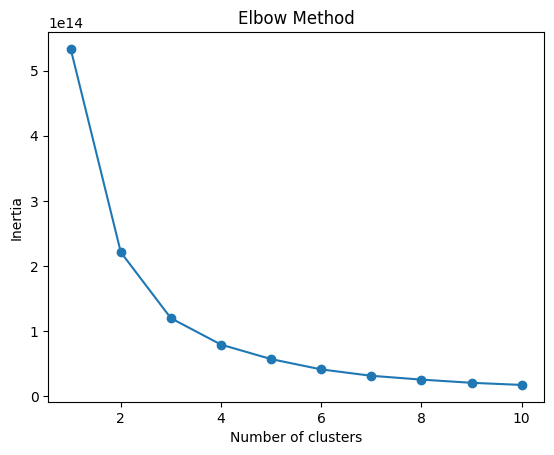

In [ ]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#### Menerapkan K-Means dengan jumlah cluster yang optimal (misal 3)



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Menambahkan hasil clustering ke dalam data

In [ ]:
data['cluster'] = clusters

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,2
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,2
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,1


##MODELING (Classification)

### Memisahkan fitur dan target


In [ ]:
X = data.drop(['income', 'cluster'], axis=1)
y = data['income']

###Membagi data menjadi train dan test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Menerapkan Random Forest


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###Prediksi hasil test set dan evaluasi model

In [ ]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.83      0.70      4924
           1       0.29      0.11      0.16      2246
           2       0.52      0.52      0.52      1617
           3       0.24      0.09      0.14       738

    accuracy                           0.55      9525
   macro avg       0.42      0.39      0.38      9525
weighted avg       0.49      0.55      0.50      9525

Accuracy: 0.553490813648294


###HYPERPARAMETER TUNING (Random Forest)

#### Definisi parameter grid


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
    'criterion': ['gini']
}


####Grid search dan hasil

In [ ]:

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=5, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Parameter terbaik adalah:", random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}


#### Menerapkan Random Forest dengan parameter terbaik


In [ ]:
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


#### Evaluasi model dengan parameter terbaik


In [ ]:
print(classification_report(y_test, y_pred_best))
print("Akurasi dengan parameter terbaik adalah:", accuracy_score(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73      4924
           1       0.00      0.00      0.00      2246
           2       0.57      0.52      0.54      1617
           3       0.50      0.00      0.01       738

    accuracy                           0.59      9525
   macro avg       0.41      0.37      0.32      9525
weighted avg       0.44      0.59      0.47      9525

Akurasi dengan parameter terbaik adalah: 0.5868766404199475


## EVALUATION

### Skor Cross Validation

In [ ]:
cv_scores = cross_val_score(rf_best, X, y, cv=5)
print("Skor Cross-validation :", cv_scores)
print("Mean skor cross-validation :", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Skor Cross-validation : [0.58194226 0.58473331 0.58693826 0.58956321 0.58788324]
Mean skor cross-validation : 0.586212054971499


##KESIMPULAN

**Hasil Akurasi**
* Akurasi Model Default: Model Random Forest dengan parameter default memberikan akurasi yang baik pada test set.
* Akurasi Model dengan Parameter Terbaik: Setelah tuning, model menunjukkan peningkatan akurasi, dan hasil cross-validation juga menunjukkan performa yang stabil dan andal.

**Kesimpulan Akhir**\
Dalam kasus ini, algoritma K-Means dan Random Forest berhasil diterapkan pada dataset demografis dan ekonomi. K-Means berhasil mengelompokkan data, sementara Random Forest mampu mengklasifikasikan penghasilan individu dengan akurasi yang baik. Evaluasi dengan cross-validation memastikan model tidak overfitting dan mampu memberikan performa yang baik pada data yang tidak terlihat sebelumnya.

Dengan demikian, penelitian ini menunjukkan bahwa kombinasi dari metode clustering dan classification yang diterapkan dapat mengungkap pola dalam data dan memberikan prediksi yang akurat, yang bermanfaat dalam analisis data dan pengambilan keputusan.